## Exploratory Data Analysis


In [5]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter US Data Analyst Roles

In [6]:
df_DA_US= df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

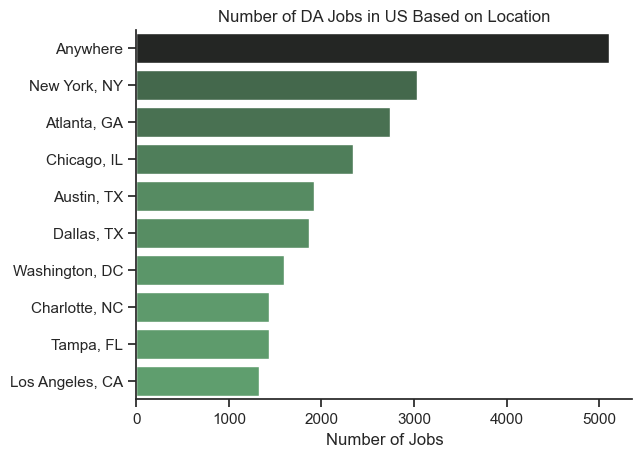

In [30]:
df_plot=df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:g_r', legend=False)
sns.despine()
plt.title("Number of DA Jobs in US Based on Location")
plt.xlabel("Number of Jobs")
plt.ylabel('')
plt.show()


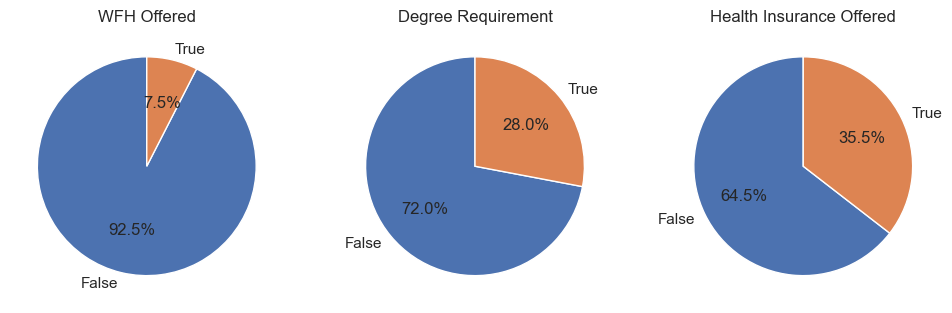

In [28]:
dict_column= {
    'job_work_from_home': 'WFH Offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

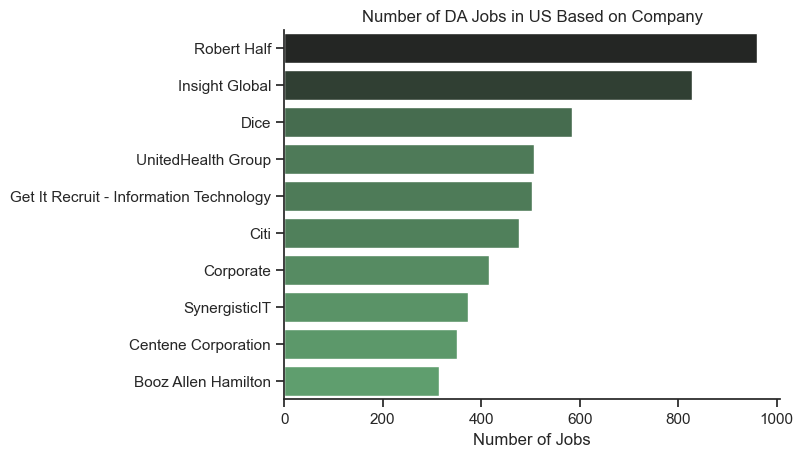

In [31]:
df_plot=df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:g_r', legend=False)
sns.despine()
plt.title("Number of DA Jobs in US Based on Company")
plt.xlabel("Number of Jobs")
plt.ylabel('')
plt.show()